In [71]:
#1. Data Preparation:

In [72]:
import pandas as pd
df = pd.read_excel(r"C:\Users\CS\Desktop\heart_disease.xlsx",sheet_name="Heart_disease")
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [73]:
#2. Exploratory Data Analysis (EDA):

In [74]:
df.shape

(908, 13)

In [75]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [77]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [78]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [80]:
# Handling missing values in 'oldpeak':
# Replaces missing entries with the median of the column.
# This helps keep the data consistent and avoids issues during model training.
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())
print(df['oldpeak'].describe())

count    908.000000
mean       0.864537
std        1.060433
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64


In [81]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

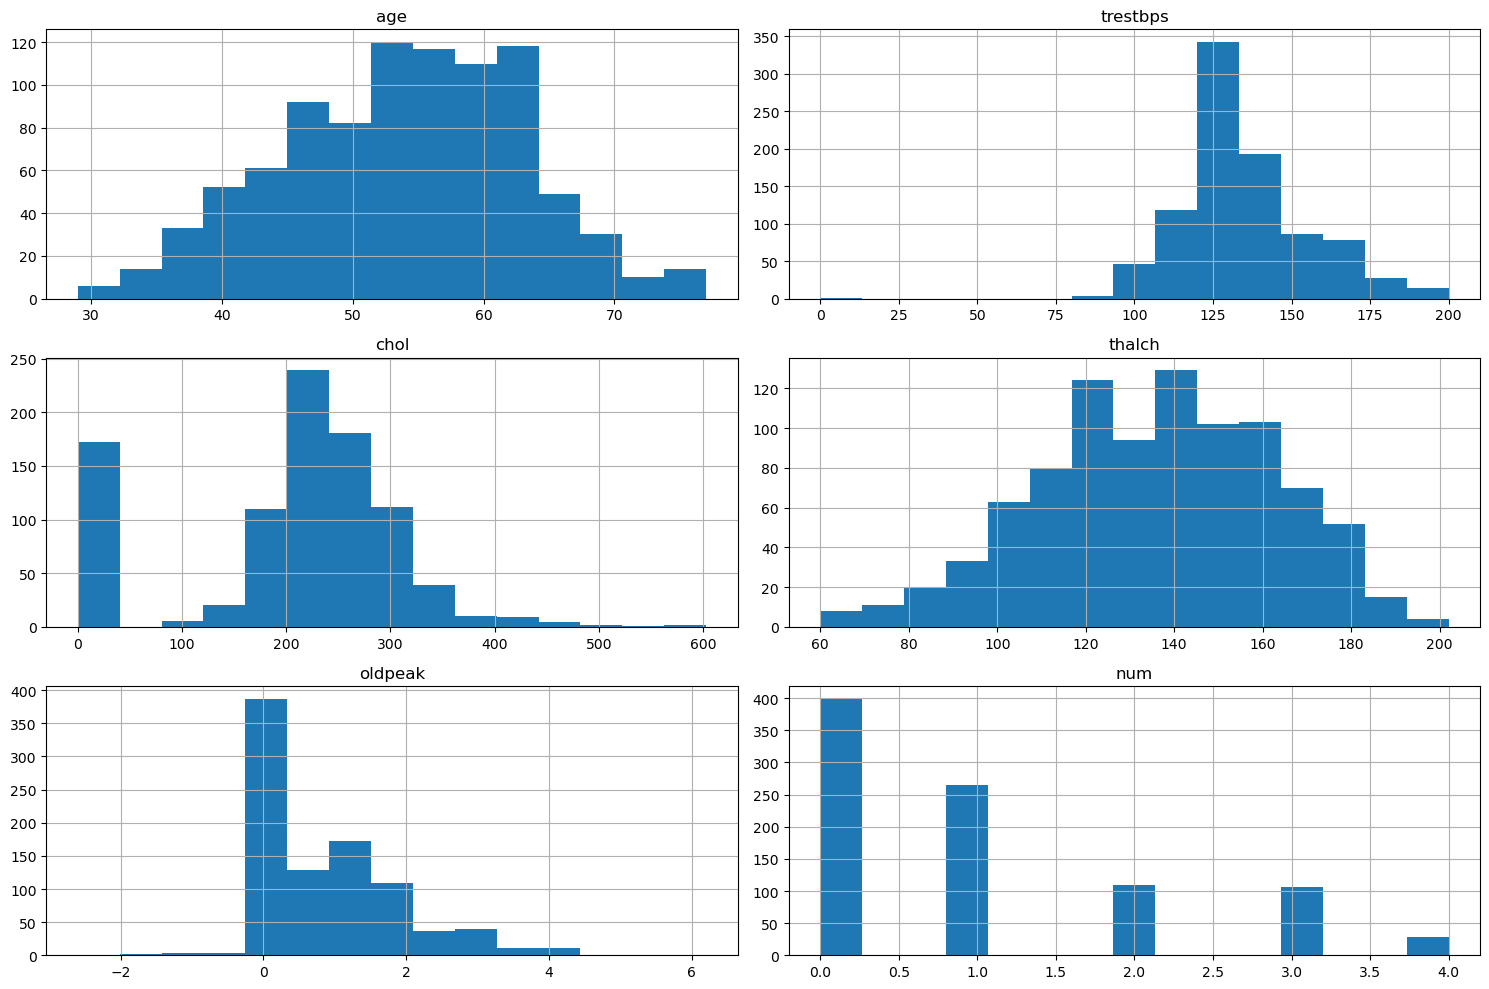

In [82]:
# Histogram for numerical data
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

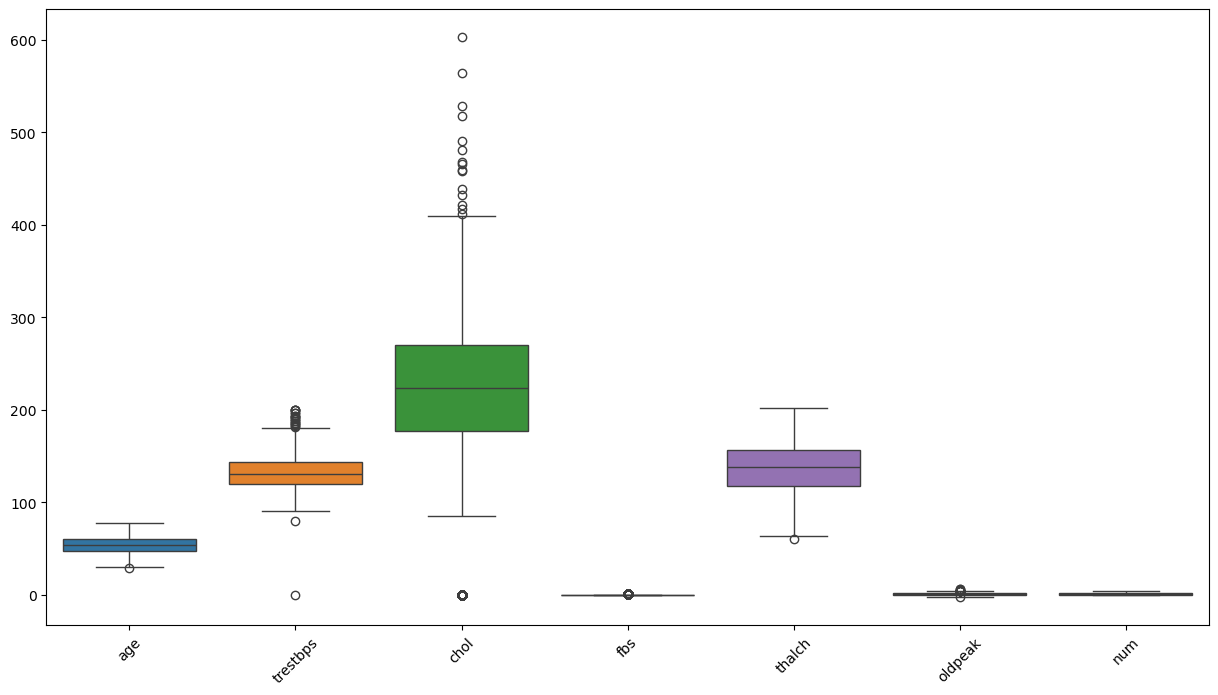

In [83]:
#boxplot for data
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [84]:
corelation=df.corr(numeric_only=True)


In [85]:
corelation

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.217942,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.134945,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.032205,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.008154,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.112624,-0.323058
oldpeak,0.217942,0.134945,0.032205,0.008154,-0.112624,1.000000,0.406078
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.406078,1.000000


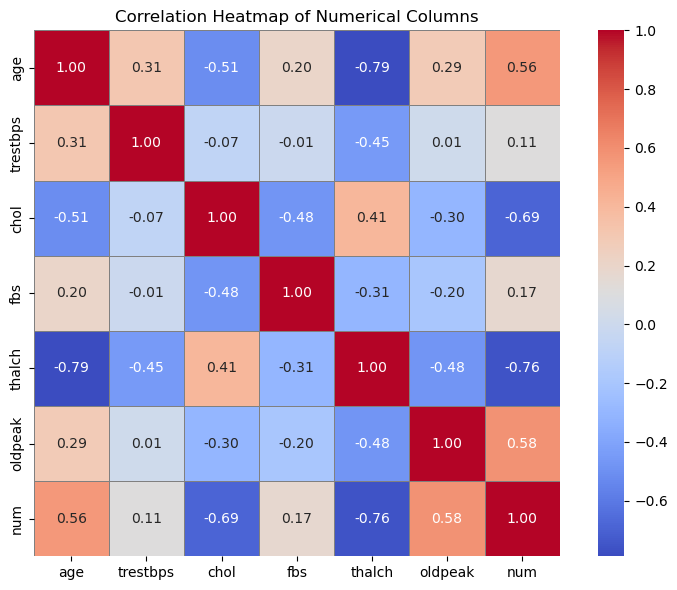

In [86]:
#	Generating correlation heatmaps 

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  
sns.heatmap(
    corelation.corr(),
    annot=True, 
    xticklabels=corelation.columns,
    yticklabels=corelation.columns,      
    fmt=".2f",                
    cmap="coolwarm",          
    linewidths=0.5,           
    linecolor='gray',         
    square=True,
)
plt.title("Correlation Heatmap of Numerical Columns")
plt.tight_layout()
plt.show()


In [87]:
#3. Feature Engineering:

In [88]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,True,False,False,True,False,False,False,False,False,False,False,False,False
1,41,135,203,False,132,0.0,0,True,True,False,False,True,False,False,False,False,True,False,False,False
2,57,140,192,False,148,0.4,0,True,False,False,False,True,False,False,False,False,True,False,False,False
3,52,118,186,False,190,0.0,0,True,False,False,True,False,False,False,False,False,True,False,False,False
4,57,110,201,False,126,1.5,0,True,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4,True,False,False,False,True,False,False,False,False,False,True,False,True
904,62,166,170,False,120,3.0,4,True,False,False,False,False,True,True,False,False,True,False,False,True
905,56,170,0,False,123,2.5,4,True,False,True,False,False,False,True,False,False,False,False,True,False
906,56,144,208,True,105,0.5,4,True,False,True,False,False,True,False,False,True,False,False,False,False


In [89]:
#4. Decision Tree Classification:

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

X = df_encoded.drop("num", axis=1)  
y = df_encoded["num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [91]:
y_pred = dt_model.predict(X_test)

In [92]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall:", recall_score(y_test, y_pred, average="macro"))
print("F1 Score:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.46703296703296704
Precision: 0.2889044902735118
Recall: 0.2871677782451081
F1 Score: 0.2850625415493805

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70        89
           1       0.30      0.33      0.32        48
           2       0.27      0.18      0.22        22
           3       0.17      0.24      0.20        17
           4       0.00      0.00      0.00         6

    accuracy                           0.47       182
   macro avg       0.29      0.29      0.29       182
weighted avg       0.47      0.47      0.47       182



In [93]:
#5. Hyperparameter Tuning:

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           scoring='accuracy',
                           cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.5344449692961738


In [95]:
#6. Model Evaluation and Analysis:

In [96]:
from sklearn import tree

best_dt = grid_search.best_estimator_

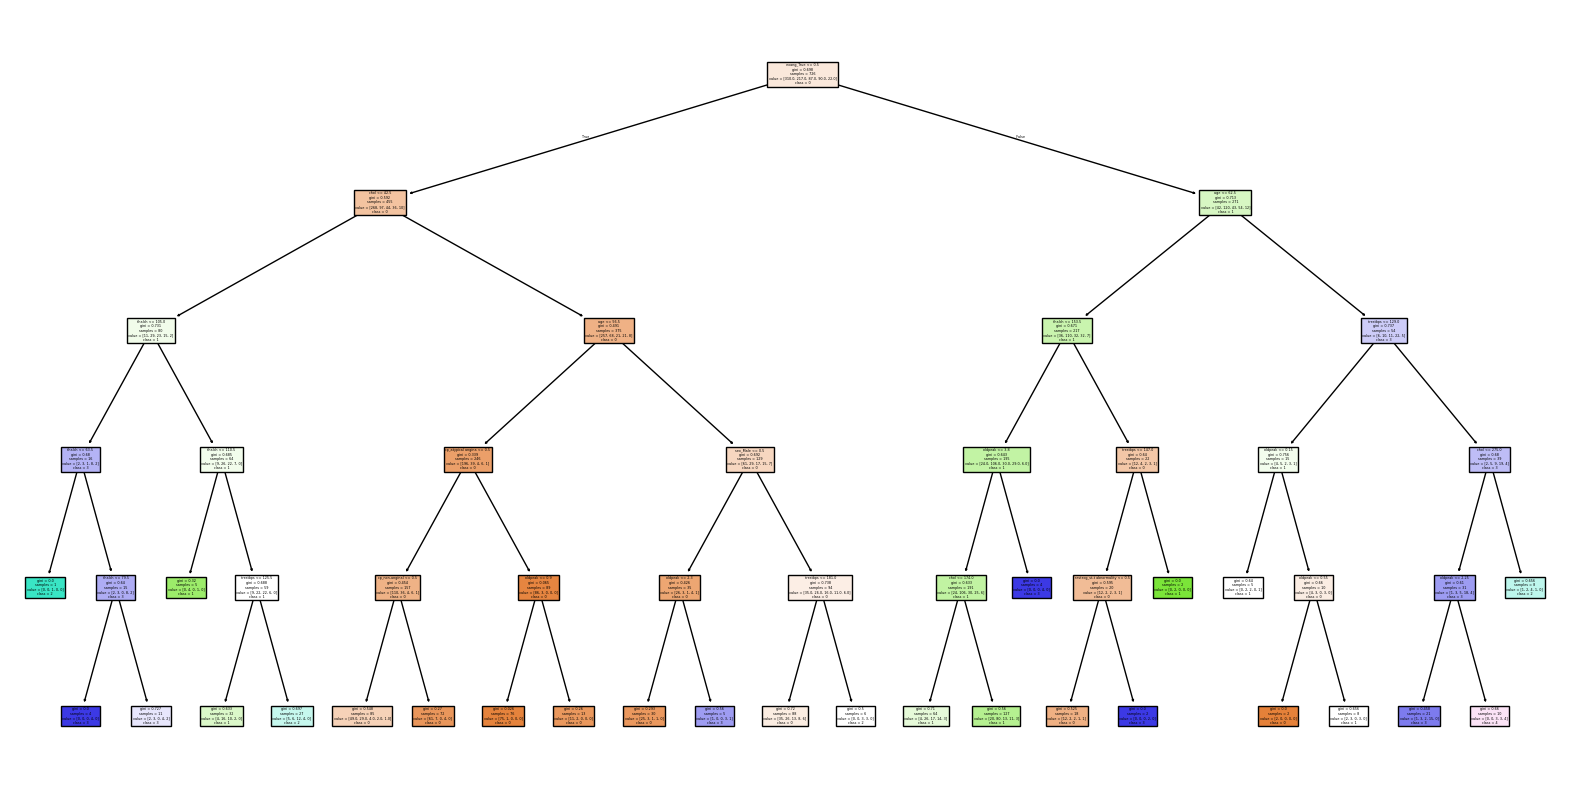

In [97]:
plt.figure(figsize=(20, 10))
tree.plot_tree(best_dt, feature_names=X.columns, class_names=[str(c) for c in y.unique()], filled=True)
plt.show()


In [98]:
# Decision Tree Visualization Insight
# The visualization illustrates how the tuned decision tree model splits the data.
# Features such as 'cp' (chest pain type), 'thal' (thalassemia), and 'oldpeak' (ST depression)
# appear near the root of the tree, highlighting their strong predictive importance in determining heart disease severity.


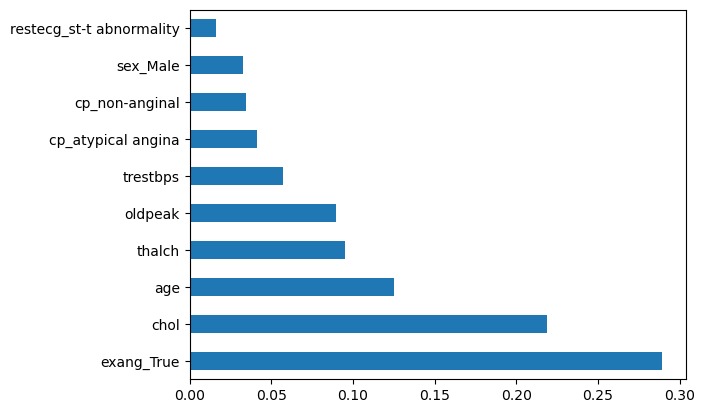

In [99]:
feat_importances = pd.Series(best_dt.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [100]:
# Feature Importance Summary
# The plot shows that 'exang_True' (exercise-induced angina) and 'chol' (cholesterol level)
# are the top features influencing heart disease severity.
# Other important features include 'age', 'thalch' (maximum heart rate), and 'oldpeak' (ST depression).


In [37]:
#Interview Questions:

In [38]:
#1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

In [39]:
# Decision Tree Regularization Parameters

# max_depth:
# Limits how deep the tree can grow.
# A deeper tree can capture complex patterns but may overfit the training data.
# Setting a maximum depth helps control model complexity and improve generalization.

# min_samples_split:
# The minimum number of samples required to split an internal node.
# Higher values prevent the model from creating small, potentially insignificant splits,
# thereby reducing overfitting and improving model robustness.

# max_leaf_nodes:
# Restricts the total number of leaf nodes in the tree.
# This limits the model’s complexity and helps prevent overfitting by simplifying the tree structure.

# min_impurity_decrease:
# A split will occur only if the decrease in impurity meets or exceeds this threshold.
# This controls how sensitive the model is to small improvements in purity,
# and helps avoid unnecessary splits that do not meaningfully improve performance.


In [40]:
#2. What is the difference between the Label encoding and One-hot encoding?

In [ ]:
# Label Encoding
# What it does: Turns each category into a number.
# Example: "Color" → Red = 0, Green = 1, Blue = 2
# Output: One column with numbers for each category.
# When to use: Good for categories with a natural order (like "small", "medium", "large").
# Caution: Not ideal for categories without order (like "red", "blue")—the model might think the numbers have meaning.

# One-Hot Encoding
# What it does: Creates a new column for each category with 1s and 0s.
# Example: "Color" → Red = [1, 0, 0], Green = [0, 1, 0], Blue = [0, 0, 1]
# Output: Several columns—one for each category.
# When to use: Best for categories with no order (like country names, colors).
# Caution: Can create a lot of columns if there are many categories—this can slow things down.
